In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data= pd.read_csv("C:\\Users\\KIIT\\Documents\\internPe\\diabetes_prediction\\diabetes.csv")

In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
#check wether if there are any null values in a coloumn 
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
#check if duplicate values exists
data.duplicated().sum()

0

# Data Visualization

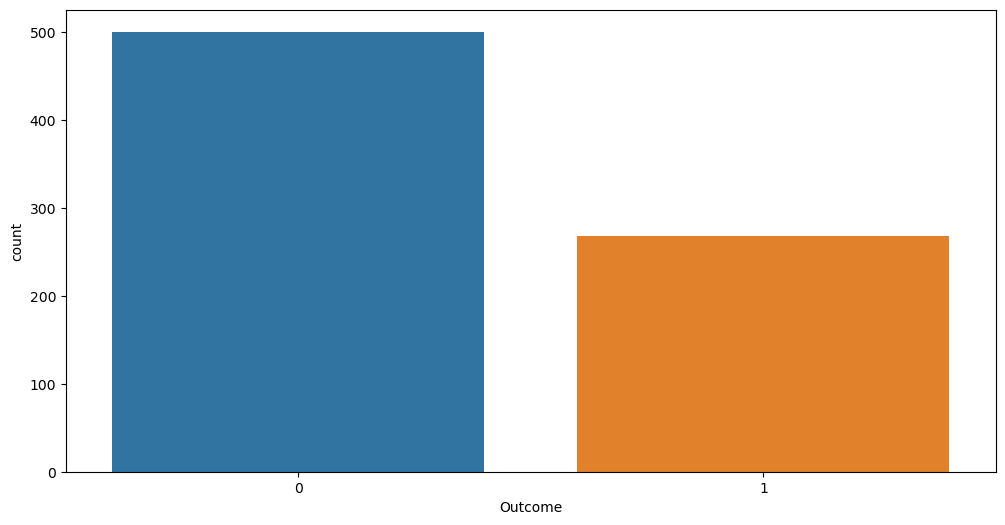

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=data)
plt.show()

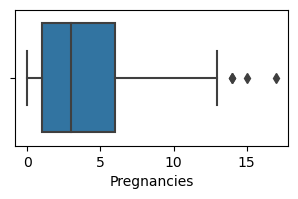

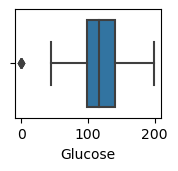

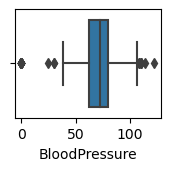

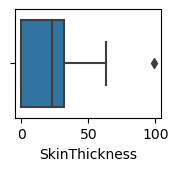

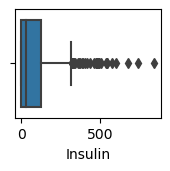

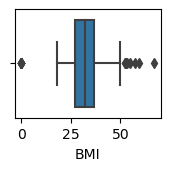

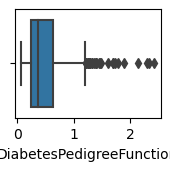

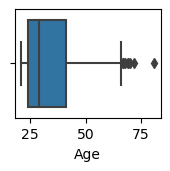

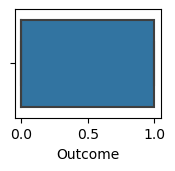

In [53]:
#observing outliers
plt.figure(figsize=(12,6))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure' ,'SkinThickness','Insulin'                    
,'BMI','DiabetesPedigreeFunction','Age','Outcome']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=col,data=data)
    plt.show()

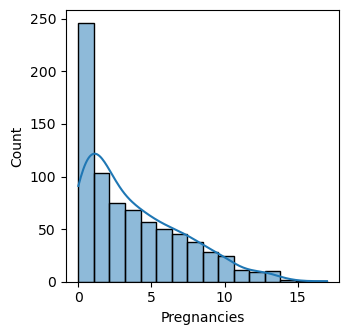

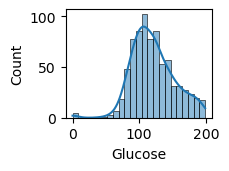

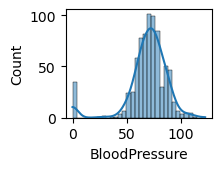

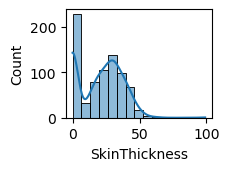

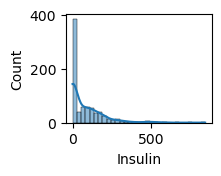

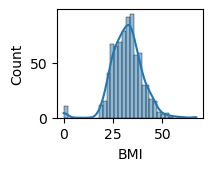

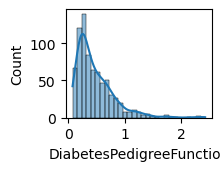

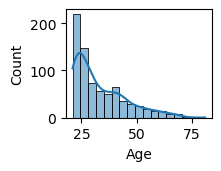

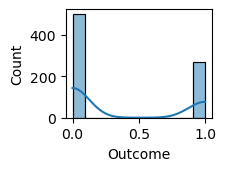

In [54]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure' ,'SkinThickness','Insulin'                    
,'BMI','DiabetesPedigreeFunction','Age','Outcome']):
    plt.subplot(3,3,i+1)
    sns.histplot(x=col,data=data,kde=True)
    plt.show()

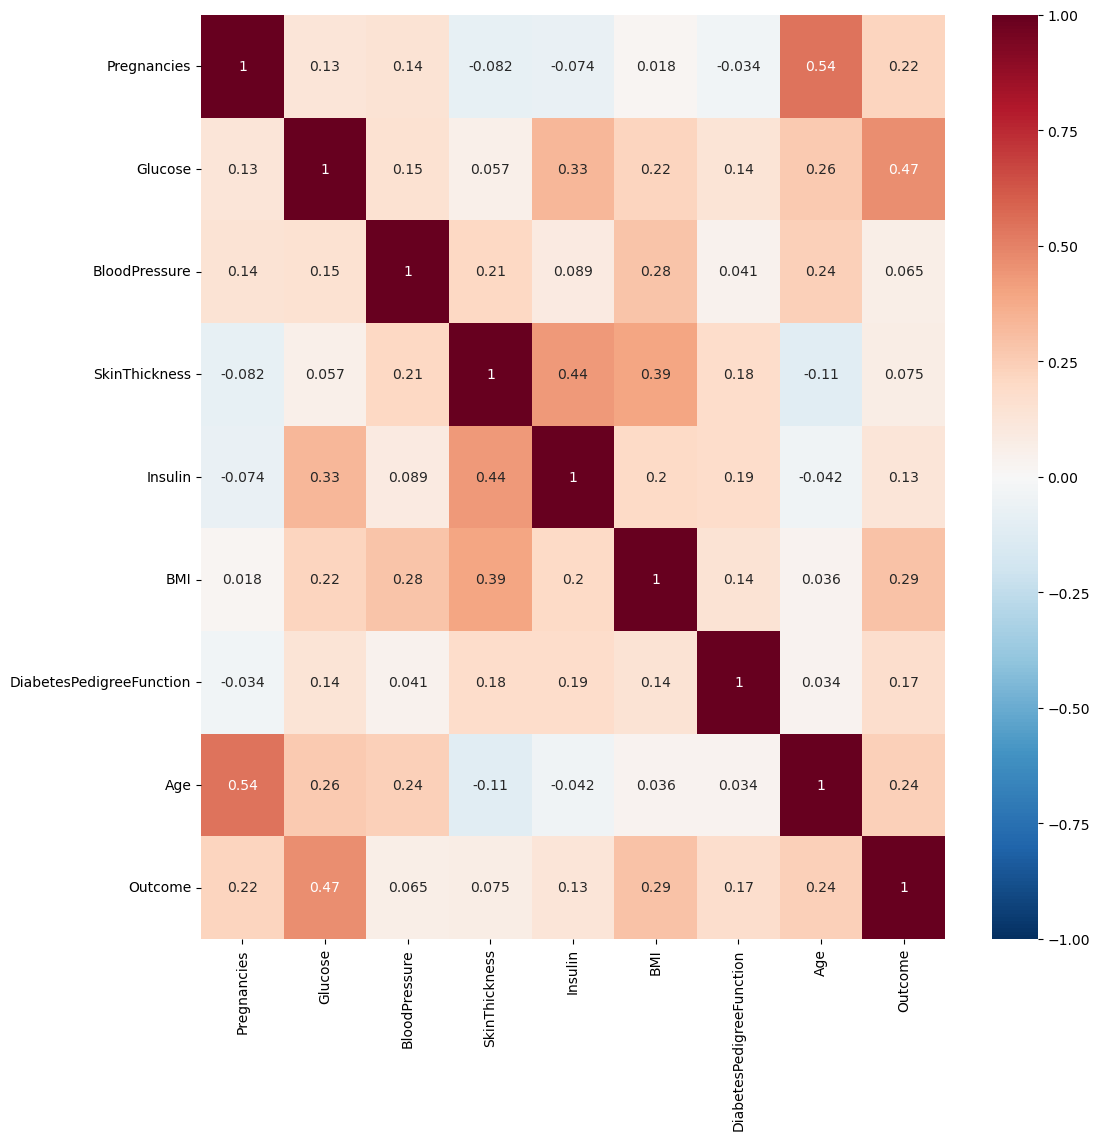

In [63]:
plt.figure(figsize= (12,12))
sns.heatmap(data.corr(),vmin = -1.0,center=0, cmap = 'RdBu_r' ,annot=True)
plt.show()

# Standard Scaling  and Label Encoding

In [75]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = pd.DataFrame(sc_x.fit_transform(data.drop(["Outcome"], axis=1)), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [79]:
y=data["Outcome"]

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [83]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))


In [85]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]

print("Max train score: {}% and k={}".format(max_train_score * 100, [i + 1 for i in train_scores_index]))


Max train score: 100.0% and k=[1]


In [86]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]

print("Max test score: {}% and k={}".format(max_test_score * 100, [i + 1 for i in test_scores_index]))


Max test score: 77.92207792207793% and k=[13]


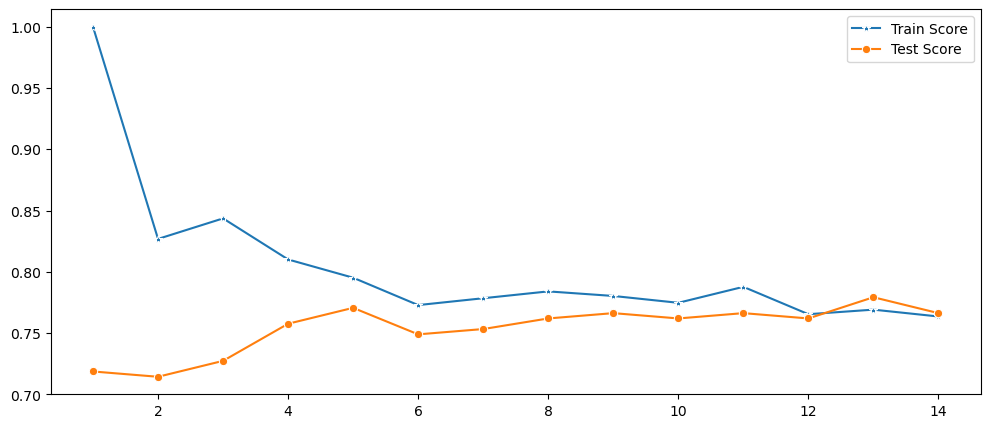

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')

plt.show()


In [117]:
knn = KNeighborsClassifier(13)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7792207792207793

In [120]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[141,  16],
       [ 35,  39]], dtype=int64)

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

